In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Load the dataset.

In [23]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Train and evaluate both models.

In [24]:
# Recreate X,y in case prior cells not run
if 'df' not in globals():
    df = pd.read_csv('data/diabetes.csv')
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [28]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)


Accuracy : 0.734
Precision: 0.648
Recall   : 0.522
F1-score : 0.579


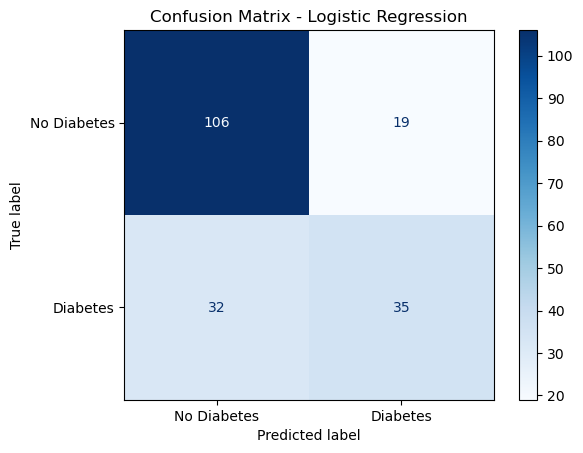

In [29]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy : {acc:.3f}\nPrecision: {prec:.3f}\nRecall   : {rec:.3f}\nF1-score : {f1:.3f}')

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes','Diabetes']).plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

KNN k=5 -> Accuracy:0.708 Precision:0.596 Recall:0.507 F1:0.548


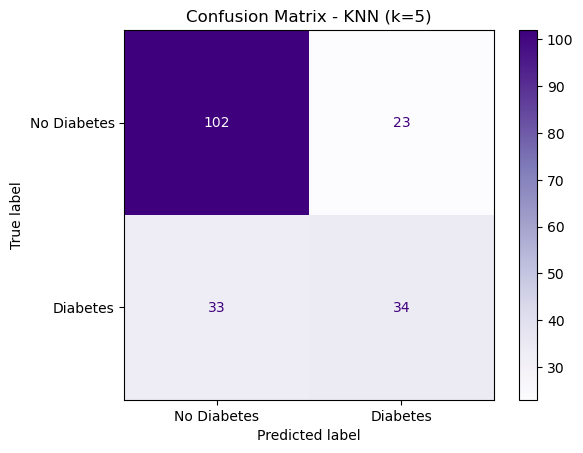

In [30]:

if 'X_train_s' not in globals():
    raise RuntimeError('Run the earlier cells to prepare scaled train/test data first.')
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_s, y_train)
y_pred_knn = knn.predict(X_test_s)

acc_k = accuracy_score(y_test, y_pred_knn)
prec_k = precision_score(y_test, y_pred_knn)
rec_k = recall_score(y_test, y_pred_knn)
f1_k = f1_score(y_test, y_pred_knn)
print(f'KNN k=5 -> Accuracy:{acc_k:.3f} Precision:{prec_k:.3f} Recall:{rec_k:.3f} F1:{f1_k:.3f}')

cm_k = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_k, display_labels=['No Diabetes','Diabetes']).plot(cmap='Purples')
plt.title('Confusion Matrix - KNN (k=5)')
plt.show()